In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [14]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [15]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 288us/step - loss: 0.6931 - accuracy: 0.0061 - val_loss: 0.6930 - val_accuracy: 0.0061
Epoch 2/50
50000/50000 [==============================] - 14s 277us/step - loss: 0.6929 - accuracy: 0.0061 - val_loss: 0.6929 - val_accuracy: 0.0062
Epoch 3/50
50000/50000 [==============================] - 14s 279us/step - loss: 0.6928 - accuracy: 0.0062 - val_loss: 0.6927 - val_accuracy: 0.0063
Epoch 4/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.6926 - accuracy: 0.0064 - val_loss: 0.6924 - val_accuracy: 0.0066
Epoch 5/50
50000/50000 [==============================] - 15s 291us/step - loss: 0.6919 - accuracy: 0.0069 - val_loss: 0.6904 - val_accuracy: 0.0075
Epoch 6/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.6839 - accuracy: 0.0082 - val_loss: 0.6779 - val_accuracy: 0.0088
Epoch 7/50
50000/50000 [==============================] 

In [16]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [17]:
encoded_test_data.shape

(10000, 32)

In [18]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [19]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [20]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RSADB.csv', index = False)

In [21]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [22]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 6


In [23]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [24]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [25]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
68,3,cat,0.000000,0.331733,0.894211,0.960071,0.000000,0.259527,0.000000,0.007616,...,0.000000,0.000000,0.067557,0.0,0.477973,0.454236,0.0,0.000000,1.000000,0.000000
5483,1,automobile,0.000000,0.335190,1.082645,1.057167,0.000000,0.272295,0.000000,0.000000,...,0.000000,0.000000,0.106920,0.0,0.592279,0.471846,0.0,0.000000,0.998452,0.001548
2861,5,dog,0.000000,0.331381,1.090299,1.086622,0.000000,0.338785,0.000000,0.095710,...,0.000000,0.000000,0.152234,0.0,0.552540,0.563335,0.0,0.000000,0.996752,0.003248
9949,3,cat,0.000000,0.361058,0.877429,0.990874,0.000000,0.350825,0.000000,0.149335,...,0.000000,0.000000,0.044197,0.0,0.542950,0.452125,0.0,0.000000,0.994934,0.005066
9050,5,dog,0.000000,0.297769,1.173487,1.151087,0.000000,0.286597,0.000000,0.000000,...,0.000000,0.000000,0.132110,0.0,0.593975,0.651814,0.0,0.000000,0.994621,0.005379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6222,0,airplane,1.722190,0.300715,0.000000,0.000000,0.170434,0.000000,2.820013,1.775159,...,2.553770,0.292773,3.106710,0.0,0.000000,0.000000,0.0,3.199296,0.082452,0.917548
8576,2,bird,1.690967,0.241691,0.000000,0.000000,0.110429,0.000000,2.214362,1.956798,...,2.356343,0.357607,2.800619,0.0,0.000000,0.000000,0.0,3.143115,0.081735,0.918265
7925,0,airplane,1.944933,0.333059,0.000000,0.000000,0.124538,0.000000,3.282980,1.068804,...,1.740375,0.687865,3.577105,0.0,0.000000,0.696906,0.0,1.948856,0.079731,0.920269
3825,0,airplane,2.467725,0.391471,0.000000,0.000000,0.168371,0.000000,3.297355,1.973606,...,2.425490,0.889911,3.948320,0.0,0.000000,0.798852,0.0,3.127362,0.071520,0.928480


In [26]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

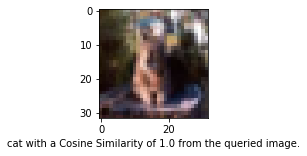

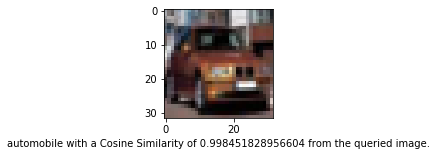

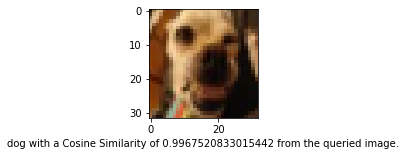

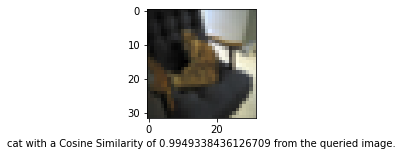

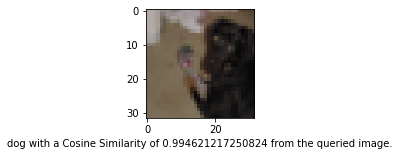

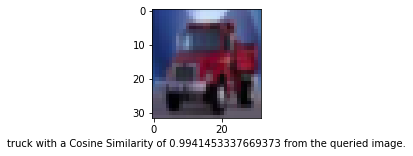

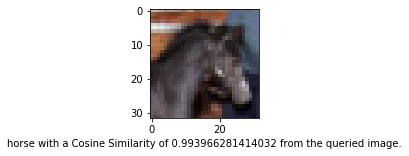

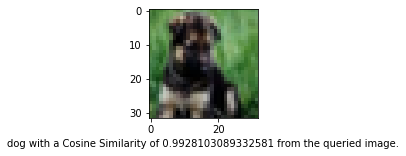

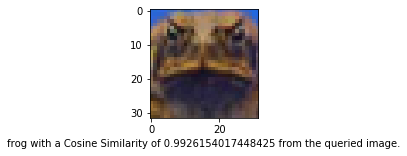

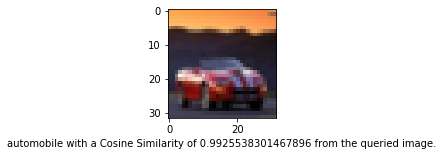

In [27]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [28]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [29]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
68,3,cat,0.000000,0.331733,0.894211,0.960071,0.000000,0.259527,0.000000,0.007616,...,0.000000,0.067557,0.0,0.477973,0.454236,0.0,0.000000,1.000000,0.000000,0.000000
7642,9,truck,0.000000,0.395284,0.904023,0.972335,0.011506,0.229961,0.000000,0.000000,...,0.000000,0.000000,0.0,0.580398,0.380722,0.0,0.000000,0.994145,0.005855,0.240556
263,7,horse,0.000000,0.267966,0.996507,0.955950,0.000000,0.178578,0.000000,0.000000,...,0.000000,0.085836,0.0,0.477191,0.521733,0.0,0.000000,0.993966,0.006034,0.245727
9949,3,cat,0.000000,0.361058,0.877429,0.990874,0.000000,0.350825,0.000000,0.149335,...,0.000000,0.044197,0.0,0.542950,0.452125,0.0,0.000000,0.994934,0.005066,0.281572
5483,1,automobile,0.000000,0.335190,1.082645,1.057167,0.000000,0.272295,0.000000,0.000000,...,0.000000,0.106920,0.0,0.592279,0.471846,0.0,0.000000,0.998452,0.001548,0.296119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,0,airplane,1.858338,0.000000,0.000000,0.000000,1.134433,0.000000,2.822017,0.278410,...,0.000000,2.575443,0.0,0.869759,0.000000,0.0,3.713821,0.171698,0.828302,11.047344
1494,7,horse,3.809115,1.965864,0.000000,0.000000,0.085244,0.032357,3.091275,3.697939,...,2.823809,4.280094,0.0,0.000000,3.951704,0.0,2.546656,0.119739,0.880261,11.122286
9801,6,frog,2.526868,0.070294,4.157445,0.000000,0.000000,0.000000,5.238747,0.437681,...,0.686607,6.147679,0.0,0.895866,5.713538,0.0,0.000000,0.333535,0.666465,11.937216
3444,0,airplane,2.437615,0.000000,0.000000,0.000000,0.720811,0.000000,2.969610,1.568851,...,0.000000,3.141576,0.0,0.398552,0.000000,0.0,5.073610,0.116083,0.883917,11.998983


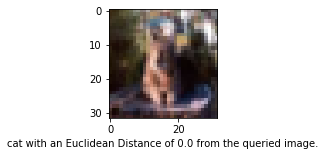

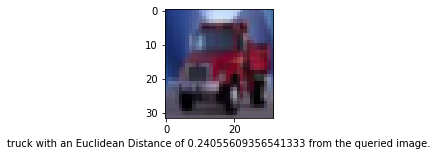

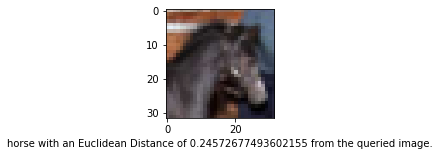

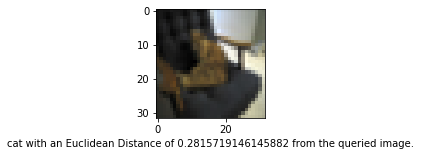

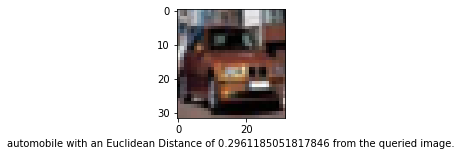

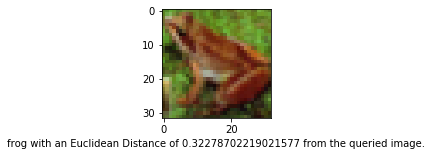

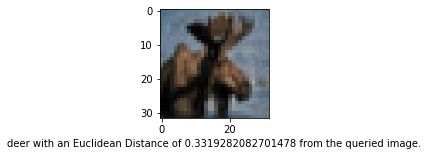

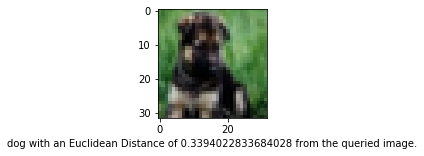

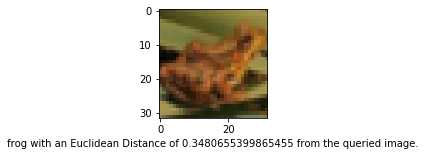

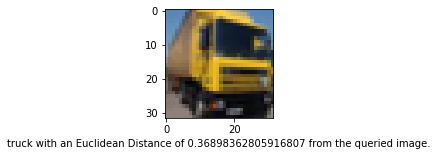

In [30]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()